# Visualizations for iEMSs 2022

This notebook is used to create visualizations, specifically for the conference.

## Imports

In [1]:
from dmdu.general.visualization import plot_conference_pathways
from model.enumerations import ProblemFormulation
import os
import pandas as pd
from ema_workbench import load_results
from matplotlib import pyplot as plt

## Directory

In [2]:
target_directory = os.path.join(
    os.path.dirname(os.getcwd()),
    'data',
    'experiments'
)

## Parameters

In [3]:
problem_formulations = [
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED
]

n_references = 4
n_seeds = 2

problem_formulations_dict = {}

## Load results

In [4]:
for problem_formulation in problem_formulations:

    pf_df = None

    for seed in range(n_seeds):
        for reference in range(n_references):

            # Define path to load data from
            file = f'{problem_formulation.name}_seed_{seed}_reference_{reference}'
            path = os.path.join(target_directory, file)

            # Load results
            _, outcomes = load_results(path)
            outcomes = pd.DataFrame(outcomes)

            # Append results
            pf_df = outcomes if pf_df is None else pd.concat([pf_df, outcomes])

    problem_formulations_dict[problem_formulation.name] = pf_df

## Visualization of KPI pathways

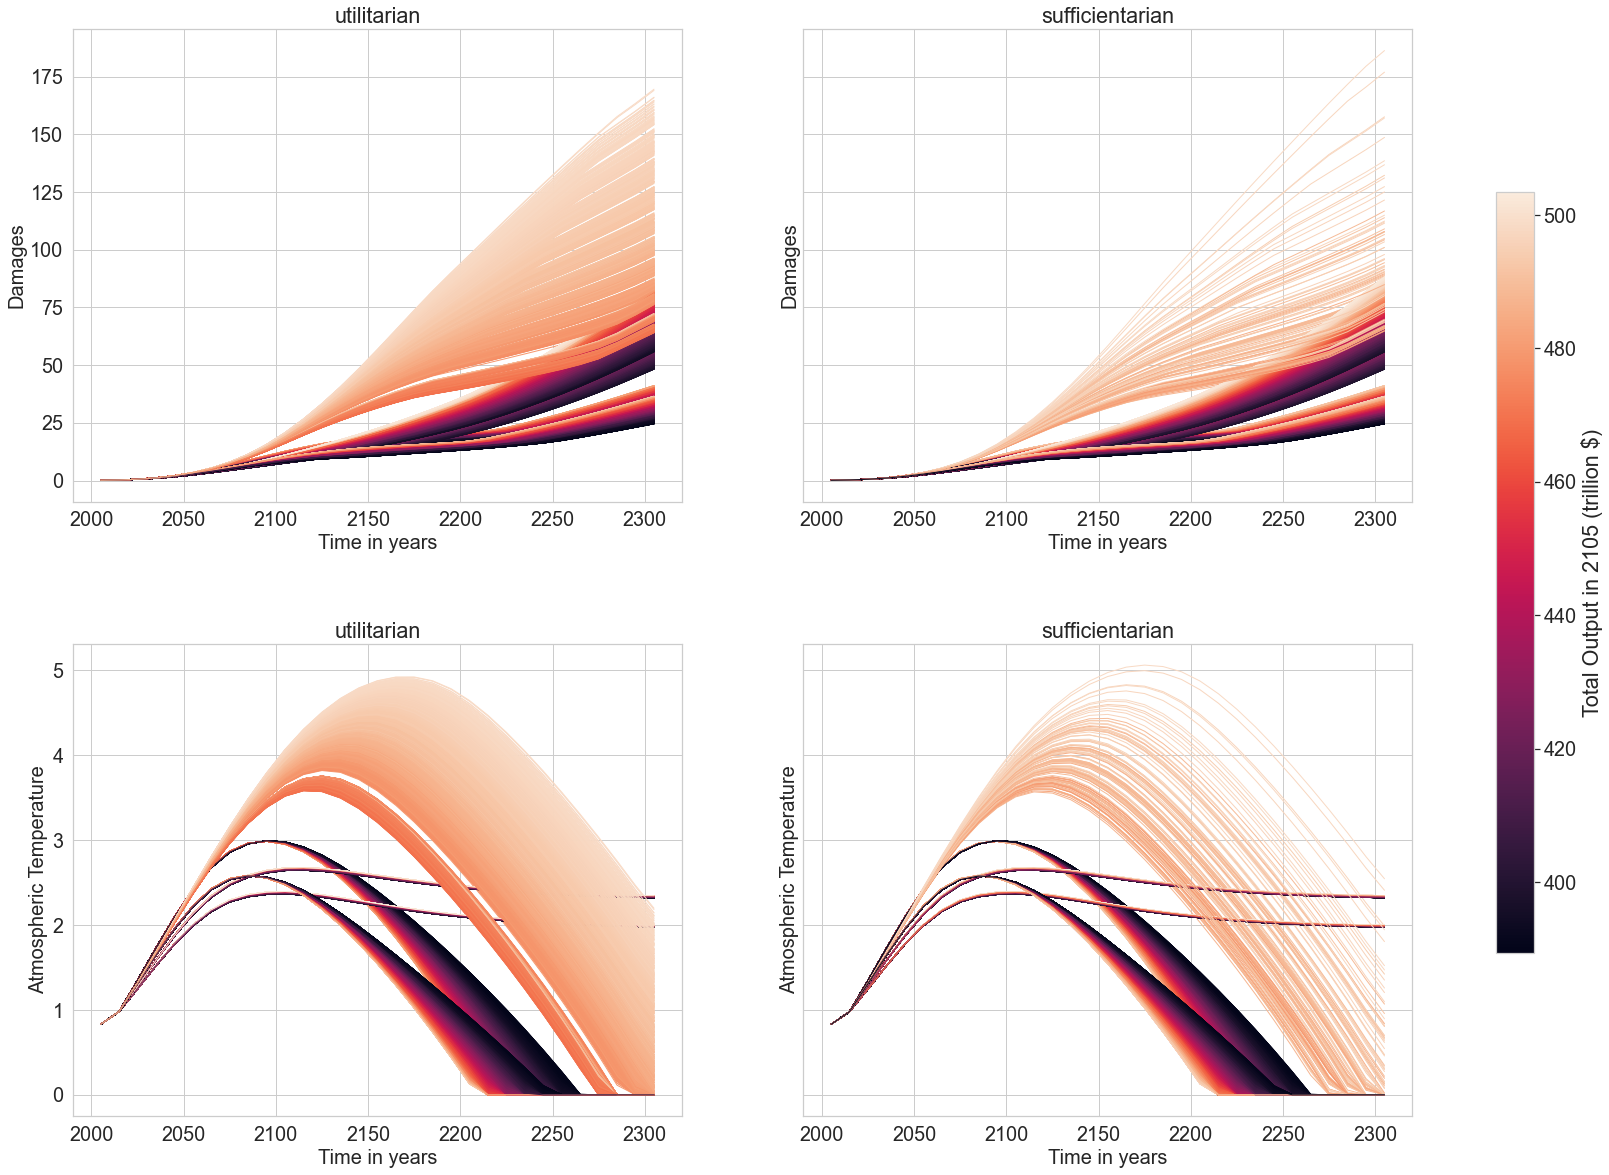

In [5]:
plt.style.use('default')
plot_conference_pathways(
        problem_formulations_dict=problem_formulations_dict,
        shaded_outcome_name='Total Output 2105',
        saving=True,
        file_name='iEMSs_pathways'
)